Wskaźnik newsów - LPP
=========================

Notowanie
---------------

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('LPP','20190520','20190525')    
                     


Analiza Twittów
----------------------

In [2]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= {  'LPP':{
                    'search': ['LPP','Reserved', 'House', 'Cropp', 'Mohito'],
                    'ignore':['sponsor'],
                    'sentiment':{
                        'kuluary':-1,
                        'lepsza':1 
                        }
                }
               }

twt =  twp.indicator('LPP','20190520','20190525')
twt_f = list(filter(lambda x: not x.ignore and x.power>10000 and x.sentiment==0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)


2293887 [] 2019-05-24 03:02:10 Home Adore
-------------------------------------------------------------------------
M&amp;M House by StudioMK27

https://t.co/3d1eGioy3w

#architecture #interiordesign #interior #decor https://t.co/VaoUognus6
-------------------------------------------------------------------------
m & AMP ; m house by StudioMK27 https : //t.co/3d1eGioy3w # architecture # interiordesign # interior # decor https : //t.co/VaoUognus6 
2293880 [] 2019-05-24 17:31:00 Home Adore
-------------------------------------------------------------------------
Modular House by Zrobym Architects

https://t.co/uM7eARvOtS

#interiordesign #interior #decor #architecture https://t.co/9QgFzQKDR9
-------------------------------------------------------------------------
Modular house by Zrobym Architects https : //t.co/uM7eARvOtS # interiordesign # interior # decor # architecture https : //t.co/9QgFzQKDR9 
430622 [] 2019-05-24 14:03:23 WPROST 🇵🇱🇪🇺
----------------------------------------------

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

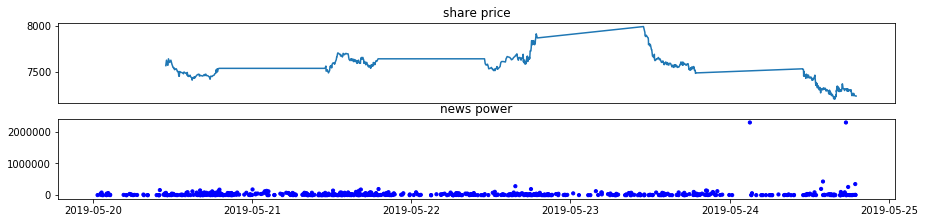

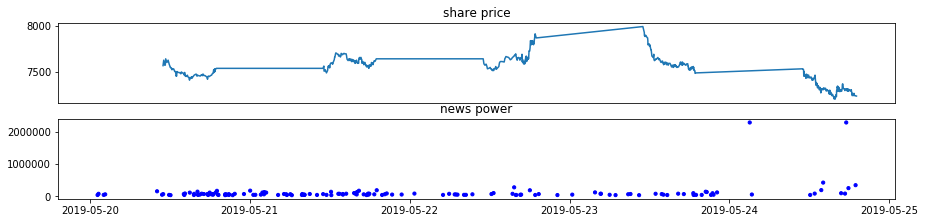

2293887 [] 2019-05-24 03:02:10 Home Adore
-------------------------------------------------------------------------
M&amp;M House by StudioMK27

https://t.co/3d1eGioy3w

#architecture #interiordesign #interior #decor https://t.co/VaoUognus6
-------------------------------------------------------------------------
m & AMP ; m house by StudioMK27 https : //t.co/3d1eGioy3w # architecture # interiordesign # interior # decor https : //t.co/VaoUognus6 
2293880 [] 2019-05-24 17:31:00 Home Adore
-------------------------------------------------------------------------
Modular House by Zrobym Architects

https://t.co/uM7eARvOtS

#interiordesign #interior #decor #architecture https://t.co/9QgFzQKDR9
-------------------------------------------------------------------------
Modular house by Zrobym Architects https : //t.co/uM7eARvOtS # interiordesign # interior # decor # architecture https : //t.co/9QgFzQKDR9 
430622 [] 2019-05-24 14:03:23 WPROST 🇵🇱🇪🇺
----------------------------------------------

In [3]:
import plot_helper 
import datetime

twt_w = twt #list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w)


twt_w2 = list(filter(lambda x: x.power>40000 ,twt))
plot_helper.plot2(data,twt_w2)

twt_w2.sort(key=lambda x: x.power, reverse=True)
for t in twt_w2:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)